# Project: Investigate a No-show appointment Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

When proper measures are taken to ensure that every one gets access to health care due to the uprising of health related issues in Brazil at a certain time, what could be the reason why some patients do not show up for their scheduled appoinment? 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The dataset is made up of 14 unique variables.

Features description :
01 - PatientId -This is the identification of a patient

02 - AppointmentID 

03 - Gender- Male or Female 

04 - AppointmentDay -The actual appointment day to visit the doctor

05 - ScheduledDay -The day someone sets up an appointment

06 - Age -of patient.

07 - Neighbourhood Where the appointment takes place.

08 - Scholarship : If Patient has free access to health care or not

09 - Hipertension : a Disease that a patient may have

10 - Diabetes : a Disease that a patient may have

11 - Alcoholism : a patient maybe involved with alcohol

12 - Handcap True or False

13 - SMS_received 1 or more messages sent to the patient.

14 - No-show True or False.


### Question(s) for Analysis
I would be considering the following questions according to the dataset,
<ul>
<li>What gender is more particular about their health and what gender shows up?</li>
<li>Does having a Scholarship determine whether a patient will show up or not?</li>
<li>Does having a certain disease affect ones ability to show up?</li>
<li>Does recieving sms have an impact of whether a patient will show up or not?</li>
</ul>



In [509]:

# import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



<a id='wrangling'></a>
## Data Wrangling


In [566]:
#Load dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#inspect few columns that makes up the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [567]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning

> There are no missing values, we will go further to check for duplicate rows in the dataset. Also change columns names to lower case to avoid mistakes. we would need to change the data type of ScheduledDay and AppointmentDay to date and change the No-show to int data type. Also replace the "-" to "_" in No-show column name



In [568]:
#Check for Duplicates
dup_df=sum(df.duplicated())
dup_df

0

In [569]:
#Check for Unique Values
df.nunique()


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [570]:
#Change columns headers to lowercase and replace - with _
df.rename(columns=lambda x:x.lower().replace("-","_"),inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [571]:
#Change datatype of Scheduled day and appointment day to date
new_date =['scheduledday','appointmentday']
for c in new_date:
    df[c] = df[c].apply(pd.to_datetime)
   

In [572]:
#Change no_show to int value where 1 means that means the patient did not showed up and 0 means patient showed up
#change data type to int
df.loc[df['no_show'] == 'Yes', 'no_show'] = 1
df.loc[df['no_show'] == 'No', 'no_show'] = 0

#Crosscheck change with few rows of data set
df.head(10)
   

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,0
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0


In [573]:
#Confirm new data types
df.dtypes

patientid                     float64
appointmentid                   int64
gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no_show                         int64
dtype: object

In [575]:
#Check characteristics of the data for any abnormalities
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000



### Data Cleaning
> Age has a minimum value of -1 which is abnormal for a human being, we will drop the record with invalid age.
The maximium age is 115 years old, which is still in order for a human being.
 

In [576]:
#Find the location of row with abnormal age and drop it

dff=df.drop(df[df['age'] == -1].index,inplace=True)


In [577]:
#Confirm drop
df[df["age"] == -1]


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [578]:
#confirm characteristics of dataset
df.describe()


,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What gender is more particular about their health and how if affects the show up?)

0    88207
1    22319
Name: no_show, dtype: int64


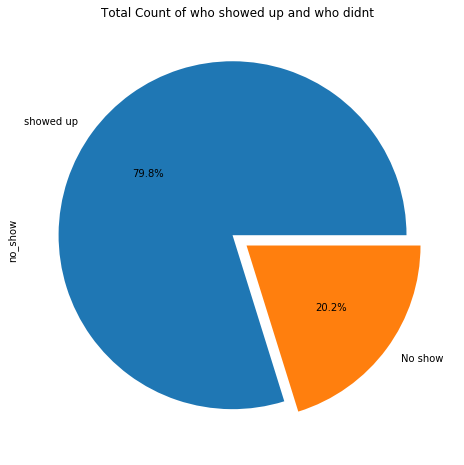

In [579]:
#counts how many values are in the no show columns
persons = df['no_show'].value_counts()
print(persons)

#See the percentage of people and their show up using a pie chart
persons.plot(kind = 'pie',labels = ['showed up','No show'], explode=(0.05,0.05),autopct = '%1.1f%%', figsize = (8,8))
plt.title("Total Count of who showed up and who didnt ");

> **Note**: From the data type change earlier done, the no_show column represent data with "1" if patient was present for their appointment and "0" if they were absent
I will further deduce the precentage to look at the data from another view

> **Note**: So far we can see that a percent of 20.2% from the total number of people did not show up, we will further check what factors may have caused this figure. 

F    71839
M    38687
Name: gender, dtype: int64


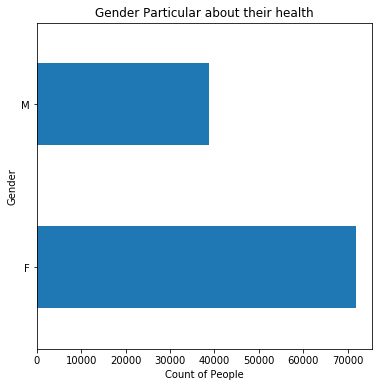

In [557]:
#Count the actual number of male and female visits to the clinic  
gender_count = df['gender'].value_counts()
print(gender_count)

#graphically represent the count of male and female on a bar chart
gender_count.plot(kind='barh',figsize=(6,6));
plt.title("Gender Particular about their health" )
plt.ylabel("Gender")
plt.xlabel("Count of People");


In [558]:
# Count Females that didnt show up and those that showed up

genderF =df.loc[(df['gender'] == 'F') & (df['no_show'] == 1)]
genderF2 =df.loc[(df['gender'] == 'F') & (df['no_show'] == 0)]
female = genderF.no_show.count(),genderF2.no_show.count()
female


(14594, 57245)

In [559]:
# Count Males that didnt show up and those that showed up

genderM =df.loc[(df['gender'] == 'M') & (df['no_show'] == 1)]
genderM2 =df.loc[(df['gender'] == 'M') & (df['no_show'] == 0)]
male = genderM.no_show.count(),genderM2.no_show.count()
male


(7725, 30962)

Text(0, 0.5, 'Count of People')

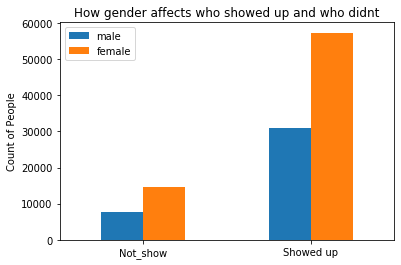

In [560]:
#Show Visualization relationship between gender and how they showed up
male = male
female = female
index = ['Not_show', 'Showed up']
df = pd.DataFrame({'male': male,'female': female}, index=index)
ax = df.plot.bar(rot=0)
plt.title("How gender affects who showed up and who didnt")
plt.ylabel("Count of People")


### Answer to the first Research question
> We can see that the females pay more attention their health, but this doesn't determine who showed up or not, the same amount of change is noticed between the male and female, even though the females visit the health centers more often, almost the same difference of if they showed up or not is showned for their male counterparts.
 

### Research Question 2  (Does having a scholarship affect show up?)

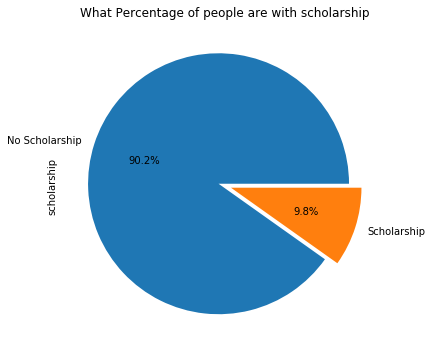

In [580]:
# Count how many people have scholarships
sch_count= df['scholarship'].value_counts()
#print(sch_count)

#graphically represent the people with scholarship to the people without scholarship using a pie chart
sch_count.plot(kind = 'pie',labels = ['No Scholarship','Scholarship'], explode=(0.05,0.05),autopct = '%1.1f%%', figsize = (6,6))
plt.title("What Percentage of people are with scholarship");



>**Note** Just a 9.8% of the total data set have scholarship, now lets see if it affects the turn up for appointments.
 

In [537]:
#this groupby lets you see the people count of no shows groupby scholarship recieved or not
schorlarhip_show= df.groupby(['scholarship','no_show'])['no_show'].count()
#print(schorlarhip_show)

# Count people without schorlarship that that didnt show up and those with scholarship that showed up
sch =df.loc[(df['scholarship'] == 0) & (df['no_show'] == 1)]
sch2 =df.loc[(df['scholarship'] == 0) & (df['no_show'] == 0)]
no_sch = sch.no_show.count(),sch2.no_show.count()
print(no_sch)

# Count people with schorlarship that didnt show up and those with scholarship that showed up
sch =df.loc[(df['scholarship'] == 1) & (df['no_show'] == 1)]
sch2 =df.loc[(df['scholarship'] == 1) & (df['no_show'] == 0)]
yes_sch = sch.no_show.count(),sch2.no_show.count()
print(yes_sch)

scholarship  no_show
0            0          79925
             1          19741
1            0           8283
             1           2578
Name: no_show, dtype: int64
(19741, 79925)
(2578, 8283)


Text(0, 0.5, 'Count of People')

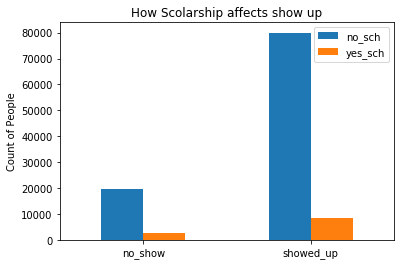

In [538]:
# Plot a bar graph to compare the amount of people with/without schlolarship that showed up vs those who didnt
no_sch = no_sch
yes_sch = yes_sch
index = ['no_show', 'showed_up']
df = pd.DataFrame({'no_sch': no_sch,'yes_sch': yes_sch}, index=index)
ax = df.plot.bar(rot=0)
plt.title("How Scolarship affects show up")
plt.ylabel("Count of People")


### Answer to the Second Research question
> We can see that the amount of people who have free medicals/scholarhsip doest not affect the turn up, a person without the scholarship is more likely to show up for their appointment
 

### Research Question 3  (Does having a certain disease affect show up?)

    alcoholism hipertension     diabetes
  value_counts value_counts value_counts
0       107166        88725       102583
1         3360        21801         7943


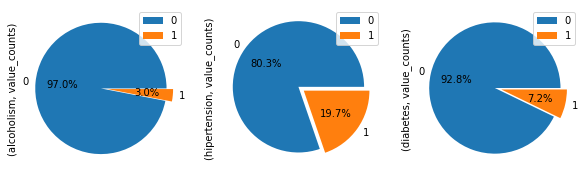

In [581]:
# Count how many people had specific diseases
disease_count =df[['alcoholism','hipertension','diabetes']].agg(['value_counts'])
print(disease_count)
disease_count.plot(kind = 'pie', explode=(0.05,0.05),autopct = '%1.1f%%', figsize = (10,10),subplots=True);



>**Note** Of the total population data set, patients with diseases hold a very small percentage.
 

(3772, 18029)


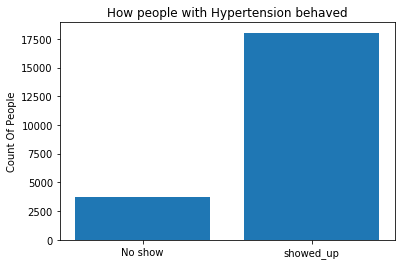

In [582]:
# Hypertension
#we will count people with hypertension and if it affects show up rate

hyper_noshow =df.loc[(df['hipertension'] == 1) & (df['no_show'] == 1)]
hyper_show =df.loc[(df['hipertension'] == 1) & (df['no_show'] == 0)]
hyper = hyper_noshow.no_show.count(),hyper_show.no_show.count()
print(hyper)

#graphically represent the values of people with hypertension who showed up and the people that didnt using a bar chart
plt.bar([1,2],hyper,tick_label=["No show","showed_up"]);
plt.title("How people with Hypertension behaved")
plt.ylabel("Count Of People");

(677, 2683)


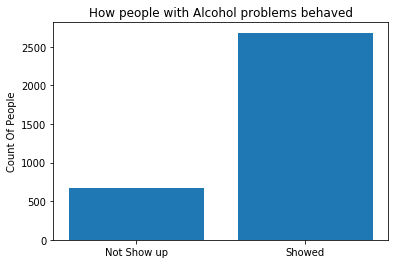

In [583]:
# Alcoholism
#we will count people with alcohol problems and how many of them showed up and how many didnt

alc_noshow =df.loc[(df['alcoholism'] == 1) & (df['no_show'] == 1)]
alc_show =df.loc[(df['alcoholism'] == 1) & (df['no_show'] == 0)]
alcoholism = alc_noshow.no_show.count(),alc_show.no_show.count()
print(alcoholism)

#graphically represent the values of people with alcoholism who showed up and the people that didnt using a bar chart

plt.bar([1,2],alcoholism,tick_label=["Not Show up","Showed"]);
plt.title("How people with Alcohol problems behaved")
plt.ylabel("Count Of People");


(1430, 6513)


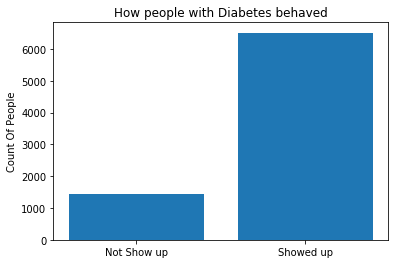

In [584]:
# Diabetes
#we will count people with Diabetes and how many of them showed up and how many didnt

diabetes_noshow =df.loc[(df['diabetes'] == 1) & (df['no_show'] == 1)]
diabetes_show =df.loc[(df['diabetes'] == 1) & (df['no_show'] == 0)]
diabetes = diabetes_noshow.no_show.count(),diabetes_show.no_show.count()
print(diabetes)

#graphically represent the values of people with alcoholism who showed up and the people that didnt using a bar chart

plt.bar([1,2],diabetes,tick_label=["Not Show up","Showed up"]);
plt.title("How people with Diabetes behaved")
plt.ylabel("Count Of People");


### Answer to the Third Research question
> looking Specifically at Alcoholism, Diabetes and hypertension, the amount of people with hypertension that did not show up is slightly lower that the total no-show amount,
> Up to Half of the people with alcohol problems showed up for their problem, so alcoholism here does not determine if one shows up for an appointment or not

### Research Question 3  (Does recieving sms have an impact of whether a patient will show up or not?)

In [585]:
# How many people recieved sms

sms_df = df['sms_received'].value_counts()
sms_df

0    75044
1    35482
Name: sms_received, dtype: int64

(9784, 25698)


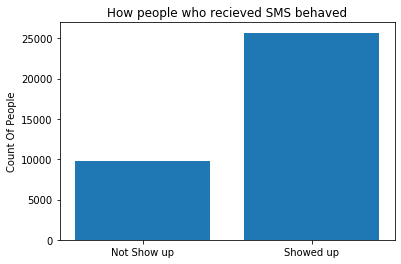

In [586]:
# Continue to explore the data to address your additional research
sms_noshow =df.loc[(df['sms_received'] == 1) & (df['no_show'] == 1)]
sms_show =df.loc[(df['sms_received'] == 1) & (df['no_show'] == 0)]
sms = sms_noshow.no_show.count(),sms_show.no_show.count()
print(sms)


#graphically represent the values of people who recieved sms who showed up and those that didnt using a bar chart

plt.bar([1,2],sms,tick_label=["Not Show up","Showed up"]);
plt.title("How people who recieved SMS behaved")
plt.ylabel("Count Of People");


<a id='conclusions'></a>
## Conclusions

> **Tip**: 

After analysing the data set trying to determine factors that affect whether a patient shows up for their appointment or not,

We can see that the females pay more attention their health, but this doesn't determine who showed up or not, the same amount of change is noticed between the male and female, even though the females visit the health centers more often, almost the same difference of if they showed up or not is showned for their male counterparts.

We can see that the amount of people who have free medicals/scholarhsip doest not affect the turn up, a person without the scholarship is more likely to show up for their appointment.

Looking Specifically at Alcoholism, Diabetes and hypertension, Patients with alcohol problems holds a 3%, patients with hypertension hold 19.7% while patients with Diabetes hold 7.2% , this has little impact on whether patients showed up for their appointment or not. The amount of people with hypertension that did not show up is slightly lower that the total no-show amount, Out of 110,527 records, only 3360 people have alcohol problem, so alcohol may as well be irrelevant to take note of while considering what affects people show up, Up to Half of the people with alcohol problems showed up for their problem. Patiets with diabetes also hold a very small portion of the total count of people

A lot of people showed up regardless of the sms recieved, more people who didnt recieve the sms showed up compare to those who read the sms. So the SMS has little or no impact on whether a person shows up or if they didnt.


> **Limitation**:
The content of the sms is not stated, if it was a reminder for the appointment, would it have had an impact on if patients show up. Was the SMS sent prior to the time of the appointment, or after the appointment?

> Dataset was cleaned so far based on assumption of what data means in some columns, to assume that 1 means yes and 0 means no for cases of sms recieved, alcoholism, diabetes, and hypertension.
Also for no_show value, 1 yes means there is no show that means a patient did not show up for their appointment, and no means they actually showed up,quite confusing at the begining. 


> **Resources used**:

1 - https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html

2 - https://stackoverflow.com/questions/41254470/how-to-make-bar-plot-with-converting-the-month-column-in-python

3 - https://stackoverflow.com/questions/58887571/plotting-2-pie-charts-side-by-side-in-matplotlib



In [588]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0